# Build a simple model with Python

In this notebook we will create a simple decision tree model to classify countries into low and high happiness based on life expectancy and unemployment.  We will use a really tiny data set with just 12 rows.  This is unrealistic for any real machine learning, but it will help our learning.

In [2]:
# Import Python libraries for data manipuation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot

# Import the Python machine learning libraries we need
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Import some convenience functions.  This can be found on the course github
from functions import *

SyntaxError: invalid syntax (<ipython-input-2-c0ea52ac93b3>, line 10)

## Define the Task

"Use life expectancy and long-term unemployment rate to predict the perceived happiness (low or high) of inhabitants of a country."

## Acquire Clean Data

In [2]:
# Load the data set
dataset = pd.read_csv("world_data_really_tiny.csv")

## Understand the data

### Inspect the Data

In [3]:
# Inspect first few rows
dataset.head(12)

NameError: name 'dataset' is not defined

In [ ]:
# Inspect data shape
dataset.shape

In [ ]:
# Inspect descriptive stats
dataset.describe()

### Visualise

In [4]:
# View univariate histgram plots
histPlotAll(dataset)

NameError: name 'histPlotAll' is not defined

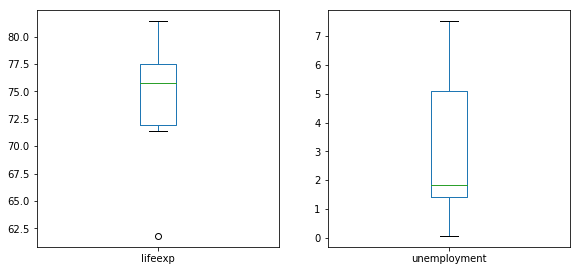

In [7]:
# View univariate box plots
boxPlotAll(dataset)

In [5]:
# View class split
classComparePlot(dataset[["happiness","lifeexp","unemployment"]], 'happiness', plotType='hist')

NameError: name 'classComparePlot' is not defined

## Prepare the data for machine learning

### Select Features and Split into input and target features

In [6]:
# Split into input and output features
y = dataset["happiness"]
X = dataset[["lifeexp","unemployment"]]

NameError: name 'dataset' is not defined

In [7]:
X.head()

NameError: name 'X' is not defined

In [8]:
y.head()

NameError: name 'y' is not defined

## Build a model

### Split into test and training sets

In [9]:
# Split into test and training sets
test_size = 0.33
seed = 7
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size, random_state=seed)

NameError: name 'X' is not defined

In [10]:
X_train

NameError: name 'X_train' is not defined

In [11]:
X_test

NameError: name 'X_test' is not defined

In [15]:
y_train

0      Low
1      Low
11    High
8     High
3      Low
6     High
9     High
4      Low
Name: happiness, dtype: object

In [16]:
y_test

7     High
10    High
2      Low
5      Low
Name: happiness, dtype: object

### Select an algorithm

In [17]:
# Select algorithm
model = DecisionTreeClassifier()

### Fit the model to the data

In [18]:
# Fit model to the data
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Check the model

In [19]:
# Check model performance on training data
predictions = model.predict(X_train)
print(accuracy_score(y_train, predictions))

1.0


## Evaluate the model

### Compute accuracy score

In [20]:
# Evaluate the model on the test data
predictions = model.predict(X_test)

In [21]:
# Look at the predictions
predictions

array(['Low', 'High', 'High', 'Low'], dtype=object)

In [22]:
# Compute the accuracy score
print(accuracy_score(y_test, predictions))

0.5


In [23]:
# Show the model predictions against the orginal data
df = X_test.copy()
df['Actual'] = y_test
df['Prediction'] = predictions
df

,lifeexp,unemployment,Actual,Prediction
7,77.3,5.53,High,Low
10,71.4,1.26,High,High
2,75.8,2.11,Low,High
5,71.9,1.53,Low,Low


## Examine the rules created by Sklearn

You may need to run the following install to see the decision tree visualisation:

<pre>conda install python-graphviz</pre>

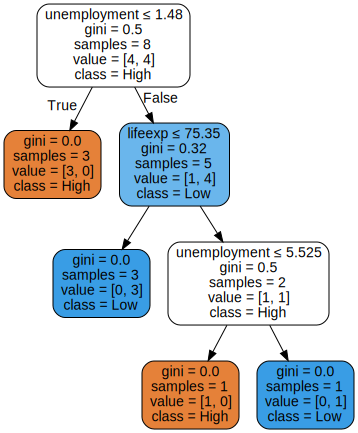

In [24]:
viewDecisionTree(model, X.columns)